In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.
recent = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
recent


'2017-08-23'

<AxesSubplot: xlabel='Date', ylabel='Inches'>

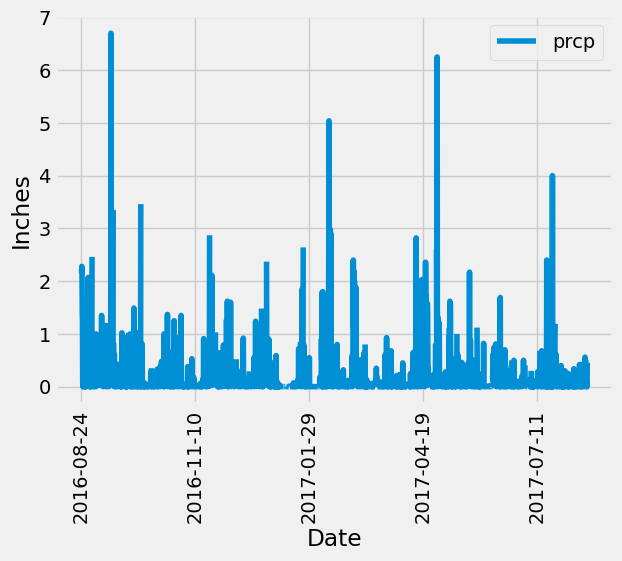

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prev_yr = dt.datetime.strptime(recent, "%Y-%m-%d") - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prev_prcp = session.query(measurement.date, measurement.prcp).filter(measurement.date>prev_yr).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prev_prcp)

# Sort the dataframe by date
prcp_index_df = prcp_df.sort_values(by="date")


# Use Pandas Plotting with Matplotlib to plot the data
prcp_index_df.plot("date", "prcp", xlabel = "Date", ylabel = "Inches", rot=90)




In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_index_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
session.query(station.name).count()


9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.id)).\
group_by(measurement.station).order_by(func.count(measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).all()

[(53.0, 87.0, 73.09795396419437)]

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_obs = session.query(measurement.station, measurement.tobs)\
.filter(measurement.station == "USC00519281")\
.filter(measurement.date >= "2016-08-23")\
.all()

<AxesSubplot: ylabel='Frequency'>

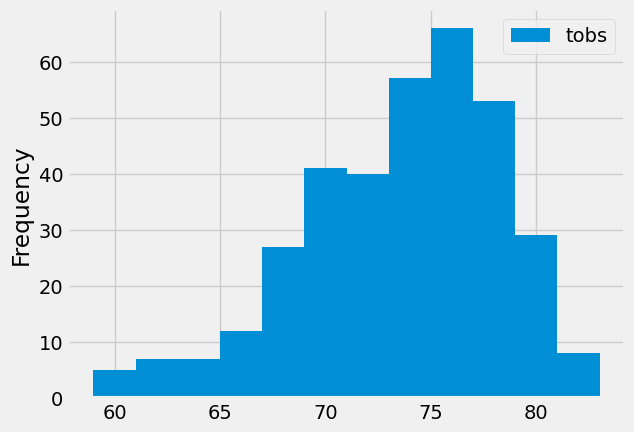

In [21]:
#Turn Query into plottable DataFrame.
obs_df = pd.DataFrame(temperature_obs)
obs_df.plot.hist(bins=12, xlabel = "Temperature(F)", ylabel = "Frequency")


# Close session

In [22]:
# Close Session
session.close()